In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
def plot_distribution(groups, column_name):
    for key,group in groups:
        sns.kdeplot(group[column_name], label= key,fill=True)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Not containing 2018

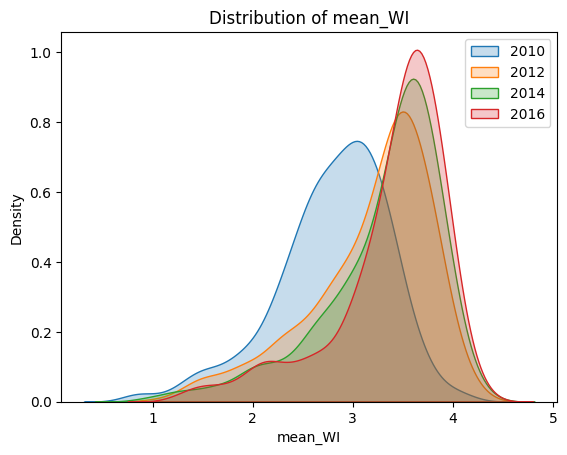

In [12]:
# Step 1: Calculate the weighted mean for each group
new_df = df.groupby(['tinh', 'huyen', 'year']).apply(lambda x: (x['pos_WI'] * x['wt9']).sum() / x['wt9'].sum()).reset_index()
new_df = new_df.rename(columns={0: 'mean_WI'})

# Step 2: Count the number of occurrences of each (tinh, huyen) group
group_counts = df.groupby(['tinh', 'huyen']).size().reset_index(name='n')

# Merge the results
new_df = new_df.merge(group_counts, on=['tinh', 'huyen'])

plot_distribution(new_df.groupby('year'), 'mean_WI')

# Containing 2018

In [16]:
df = pd.read_csv('../data/sum_WI_10-18.csv')

In [20]:
new_df = df.dropna()
a = new_df['non_w_mean_WI'] - new_df['W_mean_WI'] 

In [25]:
a.describe()

count    2776.000000
mean        0.002839
std         0.042559
min        -0.371008
25%        -0.007469
50%         0.000000
75%         0.009917
max         0.710354
dtype: float64

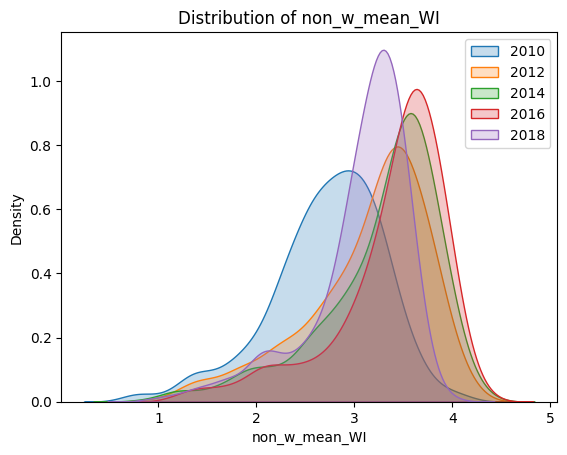

In [26]:
plot_distribution(df.groupby('year'), 'non_w_mean_WI')